In [ ]:
library(Seurat)
library(tidyverse)
library(ggplot2)

In [2]:
xe = qs::qread('xenium_a1_processed')
xe

An object of class Seurat 
499 features across 18986 samples within 5 assays 
Active assay: SCT (99 features, 99 variable features)
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: fov zoom

In [ ]:
cell_stats = read_csv('/data/petar/fgf1/resolve/baysor_segmentation/32810-1377-slide3_A1-1_results_baysor_results/baysor_cell_stats.csv')
cell_stats %>% head

In [3]:
fgf1 = qs::qread('../obob_Day5_obj_sct.qs')
fgf1

An object of class Seurat 
58613 features across 58235 samples within 3 assays 
Active assay: SCT (26292 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [4]:
xe <- NormalizeData(xe, verbose = FALSE)
xe <- FindVariableFeatures(xe, selection.method = "vst", nfeatures = 100,
                           verbose = FALSE)
xe

An object of class Seurat 
499 features across 18986 samples within 5 assays 
Active assay: SCT (99 features, 99 variable features)
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 2 spatial fields of view present: fov zoom

In [5]:
fgf1 <- NormalizeData(fgf1, verbose = FALSE)
fgf1 <- FindVariableFeatures(fgf1, selection.method = "vst", nfeatures = 2000,
                           verbose = FALSE)
fgf1

An object of class Seurat 
58613 features across 58235 samples within 3 assays 
Active assay: SCT (26292 features, 2000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [7]:
transfer_anchors = FindTransferAnchors(reference = fgf1, query = xe,
                                       dims = 1:30, reference.reduction = "pca", )

Warning message in ValidateParams_FindTransferAnchors(reference = reference, query = query, :
“Both reference and query assays have been processed with SCTransform.Setting normalization.method = 'SCT' and continuing.”
Normalizing query using reference SCT model

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 6655 anchors

Filtering anchors

	Retained 1697 anchors



In [8]:
qs::qsave(transfer_anchors, 'transfer_anchors.qs')
# transfer_anchors = qs::qread("transfer_anchors.qs")

In [17]:
cluster_class = qs::qread('../01_milo//clusters_tibble.qs') %>%
mutate(class = str_replace(object, 'exp_labelled_', '')) %>%
select(cluster, class) %>%
distinct(cluster, class) %>%
rename(labels = cluster) %>%
mutate(labels = str_replace(labels, '__', '-'))

cluster_class %>% head

labels,class
<chr>,<chr>
Astrocytes,other
a1_Tany-Astrocytes,other
MOL,other
a2_Tanycytes,other
NG2_OPC2,other
a2_Tanycytes-b1_Tanycytes,other


In [22]:
fgf1@meta.data = fgf1 %>%
`[[` %>%
rownames_to_column %>%
left_join(cluster_class, by = "labels") %>% 
column_to_rownames

In [25]:
fgf1@meta.data = fgf1 %>%
`[[` %>%
mutate(class = case_when(is.na(class) ~ 'other',
                         TRUE ~ class))

In [26]:
fgf1 %>%
`[[` %>%
select(labels, class) %>% distinct


,labels,class
,<chr>,<chr>
GCAGCCACACAGCCAC_1_1_1,Nr5a1_Bdnf,neuron
GTAATGCTCTGTCCCA_1_1_1,Gm8773_Tac1-Hdc,neuron
GATCACACACCCAAGC_1_1_1,Unassigned1.sc37,neuron
TATCTTGCATCGATAC_1_1_1,Tbx19,neuron
TGATTTCCATACTTTC_1_1_1,Unassigned1.sc17.sc28,neuron
AAGTACCTCTCCTGAC_1_1_1,Tmem215,neuron
TTCGATTTCCGCACGA_1_1_1,Unassigned2,neuron
ATAGGCTTCAGTCTTT_1_1_1,Oxt-Unassigned1,neuron
TCAAGACAGGCTCTAT_1_1_1,Sst_Pthlh.sc21,neuron


In [27]:
predictions <- TransferData(anchorset = transfer_anchors, refdata = fgf1$class,
                            dims = 1:30)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [32]:
predictions %>% head

,predicted.id,prediction.score.neuron,prediction.score.other,prediction.score.max
,<chr>,<dbl>,<dbl>,<dbl>
Cell10000_9129_13312,neuron,1.0000000,0.00000000,1.0000000
Cell10001_7423_16733,neuron,0.9102243,0.08977565,0.9102243
Cell10002_2432_2392,neuron,1.0000000,0.00000000,1.0000000
Cell10003_8358_77,neuron,1.0000000,0.00000000,1.0000000
Cell10004_9190_600,neuron,1.0000000,0.00000000,1.0000000
Cell10005_10135_15550,neuron,0.8878156,0.11218442,0.8878156


In [33]:
# Get the names of all the columns in the data frame
col_names <- names(predictions)

# Add a tag to each column name
tagged_col_names <- paste('class_', col_names, sep = "")

# Assign the new column names to the data frame
names(predictions) <- tagged_col_names


In [34]:
xe <- AddMetaData(xe, metadata = predictions)

In [ ]:
neuron_cells = predictions %>%
filter(class_prediction.score.max > 0.9) %>%
filter(class_predicted.id == "neuron") %>%
rownames

length(neuron_cells)

In [49]:
neuron_markers = FindMarkers(xe, ident.1 = neuron_cells)

In [73]:
abs(log10(1e-20 + 0))

[1] 20

In [75]:
neuron_markers = neuron_markers %>%
mutate(sort_score = abs(log10(1e-20 + 0))*avg_log2FC) %>%
arrange(desc(sort_score))

In [76]:
neuron_markers %>% head(20) %>% rownames %>% cat


Galntl6 Arhgap6 Adarb2 Cntn5 Nrxn3 Zfp804b Mgat4c Hs3st4 Cntn4 Kcnip4 Kctd16 Grm8 Egfem1 Grm7 Cacna2d3 Sorcs1 Sgcz Tenm2 Nrg3 Dcc

In [77]:
top_neuron_markers = neuron_markers %>% head(20) %>% rownames

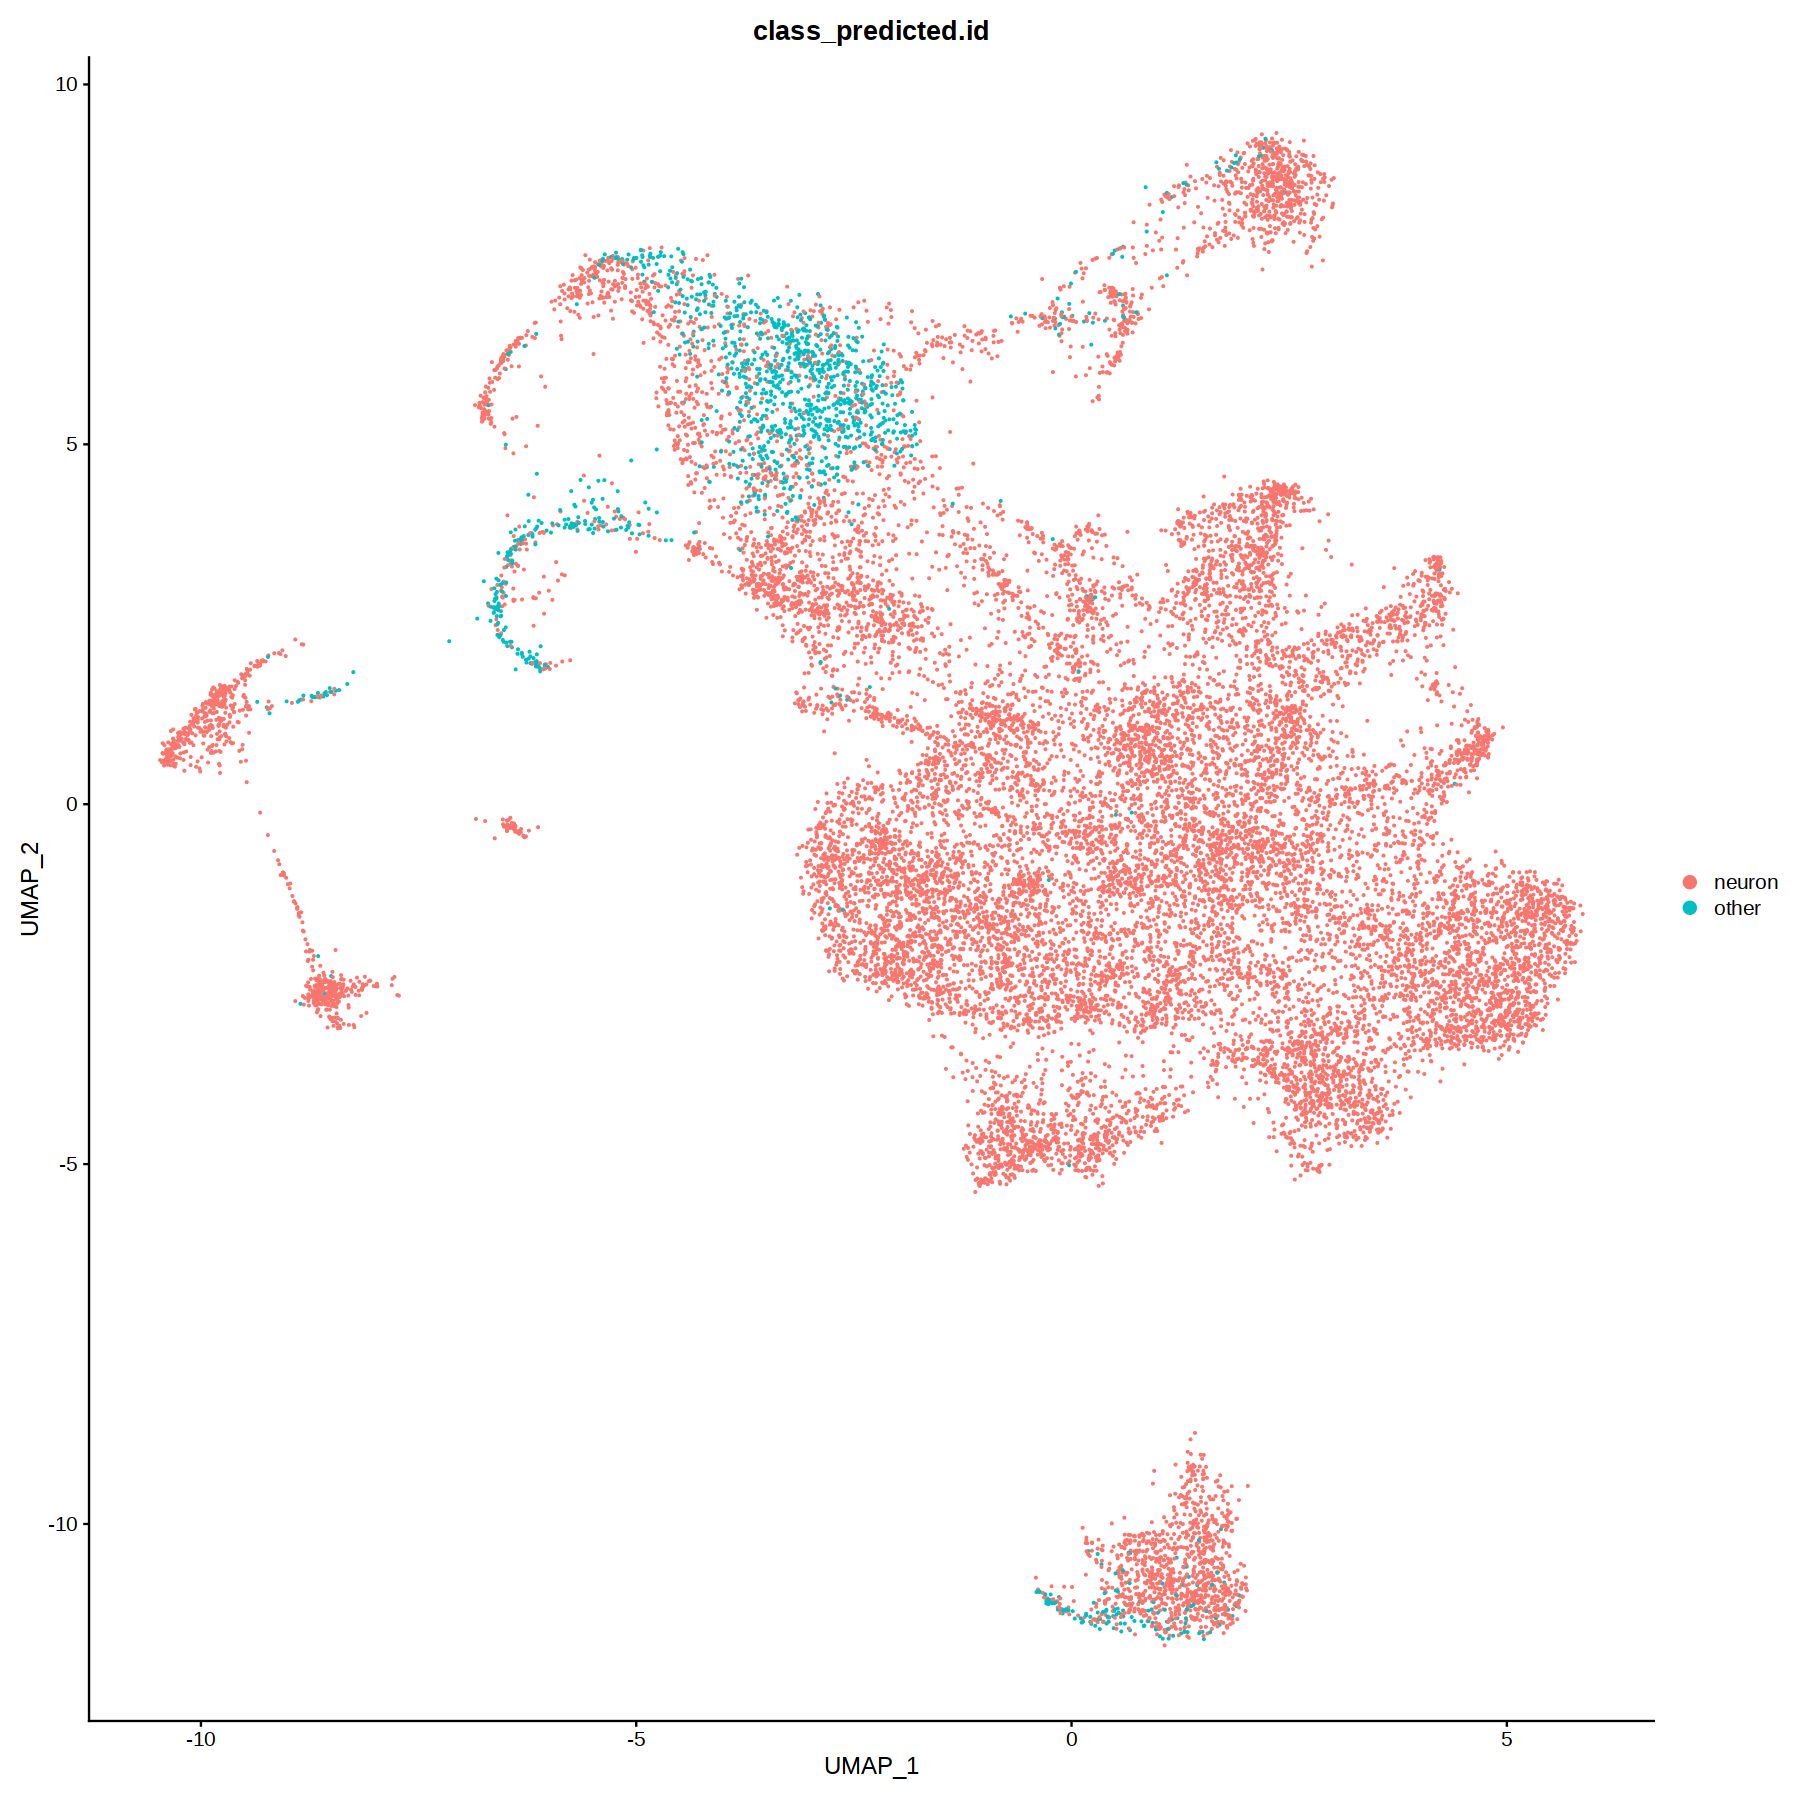

In [78]:
options(repr.plot.width=15, repr.plot.height=15)
DimPlot(xe, reduction = "umap", group.by = "class_predicted.id", repel = TRUE)


In [79]:
length(top_neuron_markers)

[1] 20

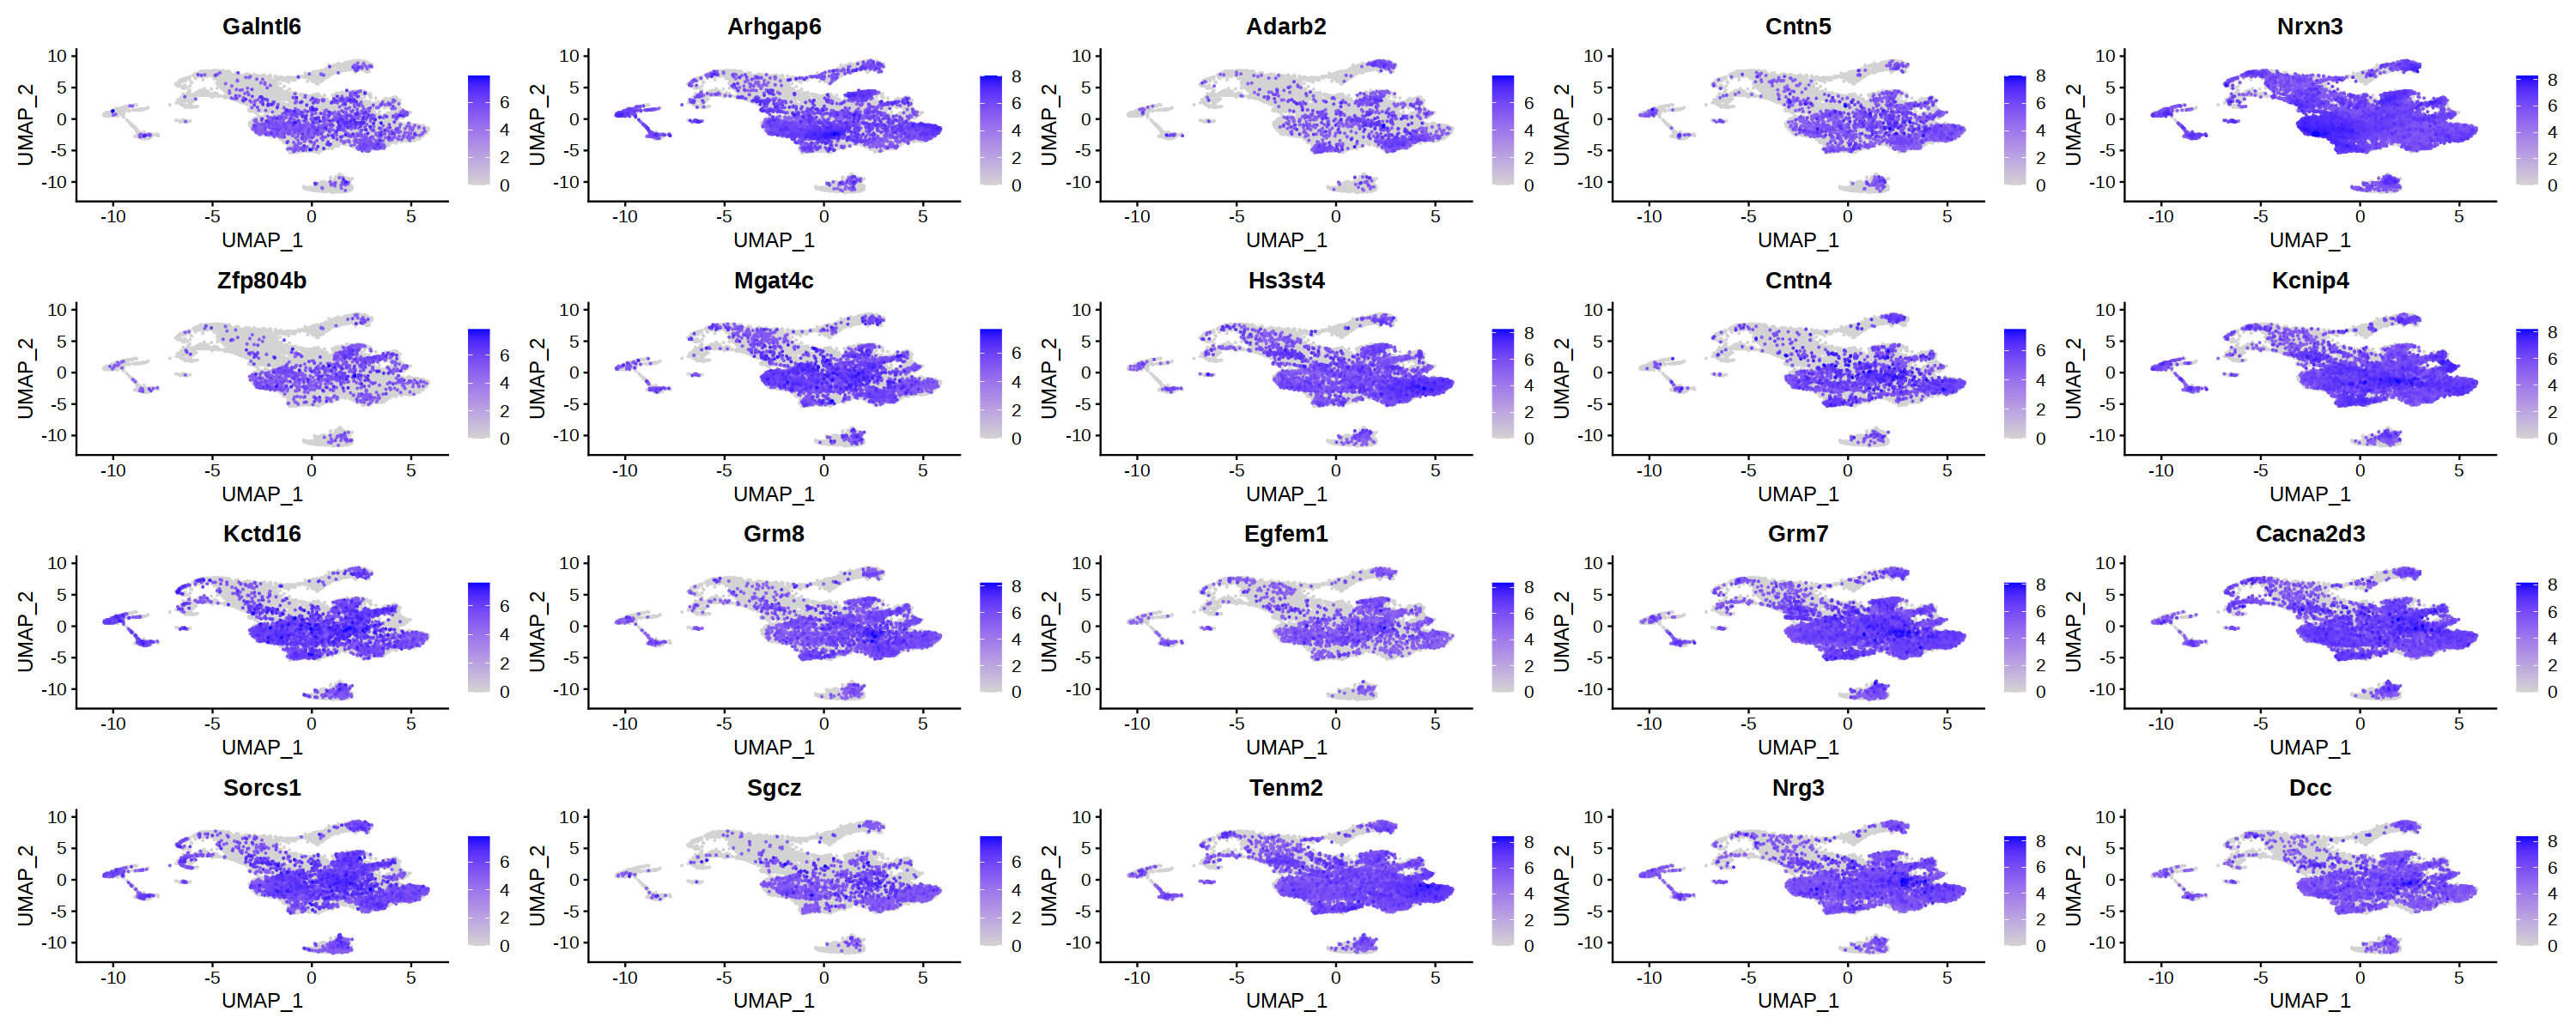

In [80]:
options(repr.plot.width=25, repr.plot.height=10)
FeaturePlot(xe, top_neuron_markers, reduction = "umap", ncol = 5, order=TRUE)

In [ ]:
transfer_anchors = FindTransferAnchors(reference = fgf1, query = xe,
                                       dims = 1:2, reference.reduction = "pca")

Warning message in ValidateParams_FindTransferAnchors(reference = reference, query = query, :
“Both reference and query assays have been processed with SCTransform.Setting normalization.method = 'SCT' and continuing.”
Normalizing query using reference SCT model

Warning message:
“Adding image data that isn't associated with any assay present”
Warning message:
“Adding image data that isn't associated with any assay present”
Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 29687 anchors

Filtering anchors



In [ ]:
predictions <- TransferData(anchorset = transfer_anchors, refdata = fgf1$class,
                            dims = 1:2)

In [87]:
predictions %>%
group_by(predicted.id) %>%
summarise(n = n())

predicted.id,n
<chr>,<int>
neuron,18986
